In [5]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!bash Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh
from konlpy.tag import Mecab


Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 7.29 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-01-21 16:17:04--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.ta

In [1]:
from konlpy.tag import Mecab
mecab = Mecab()
#NameError: name 'Tagger' is not defined 오류 발생 시 런타임을 재실행 해주세요.

In [2]:
# 한글 자모 단위 처리 패키지 설치
!pip install hgtk

In [3]:
# fasttext 설치
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

Cloning into 'fastText'...
remote: Enumerating objects: 3986, done.
remote: Counting objects: 100% (1014/1014), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 3986 (delta 888), reused 854 (delta 830), pack-reused 2972
Receiving objects: 100% (3986/3986), 8.29 MiB | 14.50 MiB/s, done.
Resolving deltas: 100% (2526/2526), done.
/content/fastText
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++17 -march=na

## 1. 데이터 로드

In [4]:
import re
import pandas as pd
import urllib.request
from tqdm import tqdm
import hgtk

In [5]:
# 네이버 쇼핑 리뷰
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7821d3d44040>)

In [6]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [7]:
total_data.head()

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


## 2. hgtk 튜토리얼



word embedding이 단어 단위의 임베딩이었다면, character embedding은 문자 단위의 임베딩입니다. 한국어를 character embedding할 수 있는 것이 바로 자음 모음 분리기 hgtk입니다.

 영어는 하나의 알파벳(52자)를 기준으로 character embedding을 하지만, 한국어에서 하나의 음절별로 character embedding을 하면 11172개의 음절이 있기 때문에 계산량이 너무 많습니다. 따라서 그보다 작은 단위인 자음,모음으로 분리하는 것입니다.

 >참고 repo: https://github.com/bluedisk/hangul-toolkit

In [8]:
# 한글인지 체크
print(hgtk.checker.is_hangul('ㄱ'))
print(hgtk.checker.is_hangul('12'))
print(hgtk.checker.is_hangul('a'))

True
False
False


In [9]:
# 음절을 초성, 중성, 종성으로 분해
print(hgtk.letter.decompose('남'))
# 초성, 중성, 종성을 하나의 음절로 결합
print(hgtk.letter.compose('ㄴ', 'ㅏ', 'ㅁ'))

('ㄴ', 'ㅏ', 'ㅁ')
남


In [10]:
# 결합할 수 없는 상황에서는 에러 발생
try:
  hgtk.letter.compose('ㄴ', 'ㅁ', 'ㅁ') # 중성이 없는 경우
except:
  print('에러 발생')

에러 발생


## 3. 데이터 전처리

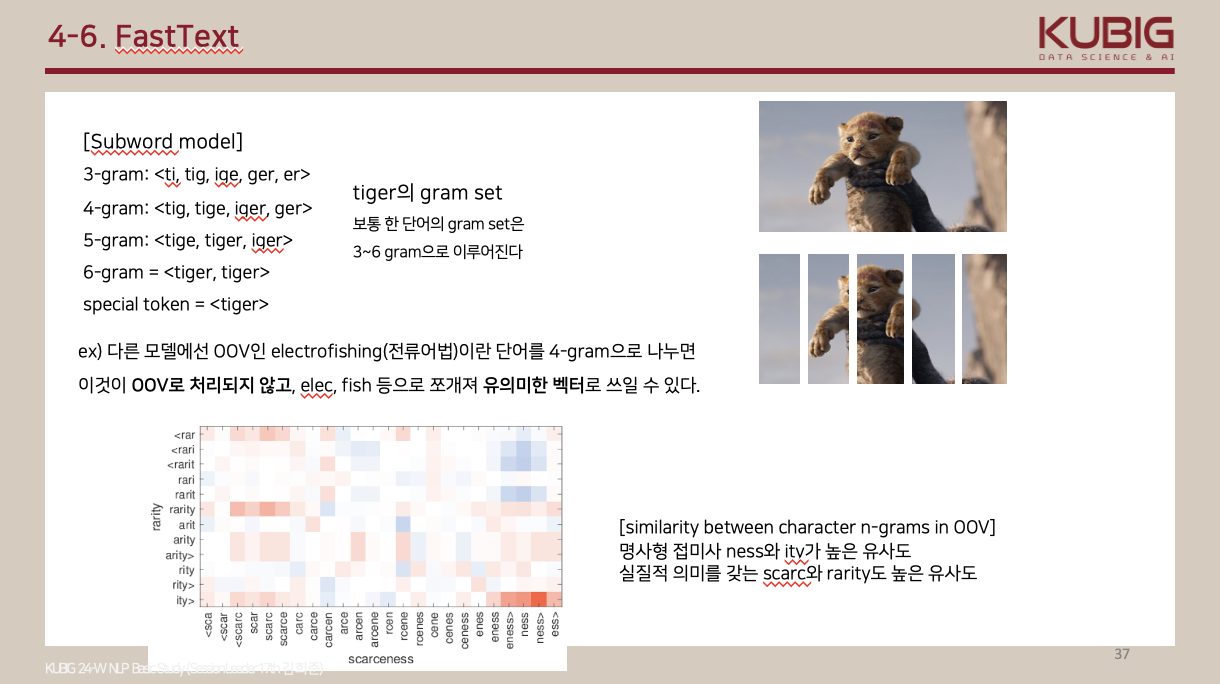

fasttext는 subword 단위로 임베딩 벡터를 생성하는 도구입니다. 한국어에서 subword는 자음 모음 단위로 생각할 수 있습니다. fasttext에 학습시킬 데이터를 만들기 위해 앞서 로드한 네이버 쇼핑 리뷰들을 hgtk를 활용해 자음 모음 단위로 전처리해봅시다.

In [11]:
def word_to_jamo(token):
  def to_special_token(jamo): # 경우에 따라 초, 중, 종성이 다 있는 게 아닌 경우도 있다. 이 경우 -를 반환해주는 함수
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(음절)을 초성, 중성, 종성으로 분리
      cho, jung, jong = hgtk.letter.decompose(char)

      # 자모가 빈 문자일 경우 특수문자 -로 대체
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # 만약 char(음절)이 한글이 아닐 경우 자모를 나누지 않고 추가
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char

  # 단어 토큰의 자모 단위 분리 결과를 추가
  return decomposed_token

In [12]:
print(word_to_jamo('남동생'))
print(word_to_jamo('야구')) # 야구의 경우 종성이 없으므로 종성 부분을 -로 반환

ㄴㅏㅁㄷㅗㅇㅅㅐㅇ
ㅇㅑ-ㄱㅜ-


In [13]:
print(mecab.morphs('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['선물', '용', '으로', '빨리', '받', '아서', '전달', '했어야', '하', '는', '상품', '이', '었', '는데', '머그', '컵', '만', '와서', '당황', '했', '습니다', '.']


In [14]:
# mecab으로 형태소를 분리해주고 그 형태소마다 각각 자음모음을 분리해주는 함수
def tokenize_by_jamo(s):
    return [word_to_jamo(token) for token in mecab.morphs(s)]

In [15]:
print(tokenize_by_jamo('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['ㅅㅓㄴㅁㅜㄹ', 'ㅇㅛㅇ', 'ㅇㅡ-ㄹㅗ-', 'ㅃㅏㄹㄹㅣ-', 'ㅂㅏㄷ', 'ㅇㅏ-ㅅㅓ-', 'ㅈㅓㄴㄷㅏㄹ', 'ㅎㅐㅆㅇㅓ-ㅇㅑ-', 'ㅎㅏ-', 'ㄴㅡㄴ', 'ㅅㅏㅇㅍㅜㅁ', 'ㅇㅣ-', 'ㅇㅓㅆ', 'ㄴㅡㄴㄷㅔ-', 'ㅁㅓ-ㄱㅡ-', 'ㅋㅓㅂ', 'ㅁㅏㄴ', 'ㅇㅘ-ㅅㅓ-', 'ㄷㅏㅇㅎㅘㅇ', 'ㅎㅐㅆ', 'ㅅㅡㅂㄴㅣ-ㄷㅏ-', '.']


In [16]:
# 리뷰 데이터의 reviews 컬럼만을 가져와서 자모 분리
tokenized_data = []

for sample in tqdm(total_data['reviews'].to_numpy()):
    tokenzied_sample = tokenize_by_jamo(sample) # 자소 단위 토큰화
    tokenized_data.append(tokenzied_sample)

100%|██████████| 200000/200000 [01:04<00:00, 3104.40it/s]


In [17]:
print(len(tokenized_data))
print("전처리 전:", total_data['reviews'][1])
print("전처리 후:", tokenized_data[1])

200000
전처리 전: 택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
전처리 후: ['ㅌㅐㄱㅂㅐ-', 'ㄱㅏ-', 'ㅇㅓㅇㅁㅏㅇ', 'ㅇㅣ-', 'ㄴㅔ-', 'ㅇㅛㅇ', 'ㅈㅓ-ㅎㅢ-', 'ㅈㅣㅂ', 'ㅁㅣㅌ', 'ㅇㅔ-', 'ㅊㅡㅇ', 'ㅇㅔ-', 'ㅁㅏㄹ', 'ㄷㅗ-', 'ㅇㅓㅄㅇㅣ-', 'ㄴㅘ-ㄷㅜ-', 'ㄱㅗ-', 'ㄱㅏ-', 'ㄱㅗ-']


단어를 자모 분리한 것을 역으로 하여 자모 상태를 단어로 다시 결합시키는 함수도 정의해봅시다. 이는 단어의 코사인 유사도를 평가할 때 자모 분리가 된 상태가 아니라 단어 상태로 편리하게 보기 위함입니다.

In [18]:
def jamo_to_word(jamo_sequence):
  tokenized_jamo = []
  index = 0

  # 1. 초기 입력
  # jamo_sequence = 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

  while index < len(jamo_sequence):
    # 문자가 한글(정상적인 자모)이 아닐 경우
    if not hgtk.checker.is_hangul(jamo_sequence[index]):
      tokenized_jamo.append(jamo_sequence[index])
      index = index + 1

    # 문자가 정상적인 자모라면 초성, 중성, 종성을 하나의 토큰으로 간주.
    else:
      tokenized_jamo.append(jamo_sequence[index:index + 3])
      index = index + 3

  # 2. 자모 단위 토큰화 완료
  # tokenized_jamo : ['ㄴㅏㅁ', 'ㄷㅗㅇ', 'ㅅㅐㅇ']

  word = ''
  try:
    for jamo in tokenized_jamo:

      # 초성, 중성, 종성의 묶음으로 추정되는 경우
      if len(jamo) == 3:
        if jamo[2] == "-":
          # 종성이 존재하지 않는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1])
        else:
          # 종성이 존재하는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
      # 한글이 아닌 경우
      else:
        word = word + jamo

  # 복원 중(hgtk.letter.compose) 에러 발생 시 초기 입력 리턴.
  # 복원이 불가능한 경우 예시) 'ㄴ!ㅁㄷㅗㅇㅅㅐㅇ'
  except Exception as exception:
    if type(exception).__name__ == 'NotHangulException':
      return jamo_sequence

  # 3. 단어로 복원 완료
  # word : '남동생'

  return word

## 4. FastText

In [19]:
import fasttext

fasttext를 실행하기에 앞서 훈련 대상인 단어들을 txt 파일로 준비해둬야 합니다. 따라서 `tokenized_data.txt`라는 파일을 쓰기 모드(w)로 생성해주고 앞서 전처리한 `tokenized_data`를 입력해줍니다.

In [20]:
with open('tokenized_data.txt', 'w') as out:
  for line in tqdm(tokenized_data, unit=' line'):
    out.write(' '.join(line) + '\n')

100%|██████████| 200000/200000 [00:00<00:00, 330945.37 line/s]


아래처럼 `train_unsupeviesd` 함수는 훈련을 시켜주는 함수입니다. 인자로 훈련할 단어가 담긴 txt 파일을 지정하고 model을 `cbow`나 `skipgram` 중에 하나를 고르면 됩니다.

##1)cbow

In [21]:
model = fasttext.train_unsupervised('tokenized_data.txt', model='cbow')

In [22]:
model.save_model("fasttext.bin")

In [23]:
model = fasttext.load_model("fasttext.bin")

In [24]:
model[word_to_jamo('남동생')] # 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

array([ 0.20295912,  0.5707981 ,  0.87103486, -0.64740765, -0.721116  ,
       -0.5641648 ,  0.10146271,  0.85390854, -0.5456046 , -0.41430095,
        0.8333492 ,  0.2350045 , -0.18085924,  0.34131783, -0.34247565,
        0.78674227, -0.16390404,  0.6100172 , -0.277992  ,  0.3902195 ,
        0.64068687, -0.49268013,  0.6862785 ,  0.07155326, -0.21830972,
       -0.5116173 ,  0.32844183,  1.0813764 ,  1.0825198 , -0.80955577,
        0.66879433, -0.5742476 ,  0.17960289, -0.5709652 ,  1.5118197 ,
       -0.29883206, -0.39651895, -0.26127824, -0.3670981 ,  0.10454486,
        0.3970291 , -0.19859193,  0.25625739,  0.14890097, -0.51591456,
       -0.69053787,  0.21894707,  0.08781137,  0.5961313 , -0.41897762,
       -0.30249965,  0.07722719,  0.5382935 ,  0.1638045 , -1.3388832 ,
        0.12875223,  0.1894972 ,  0.46559703, -0.63404   , -0.14937605,
       -0.11920847, -0.75148463, -0.09191727,  0.74194956,  0.13941965,
        0.0158555 , -0.09262516,  0.09673674, -0.21654429, -0.18

`get_nearest_neighbors` 함수를 사용하여 '남동생'이라는 단어와 가장 유사도가 높은 단어들(자모 분리된 상태)을 k개만큼 출력해줍니다.

In [25]:
model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)

[(0.8829301595687866, 'ㄷㅗㅇㅅㅐㅇ'),
 (0.8267132639884949, 'ㄴㅏㅁㅊㅣㄴ'),
 (0.7790161371231079, 'ㅊㅣㄴㄱㅜ-'),
 (0.7647615671157837, 'ㅅㅐㅇㅇㅣㄹ'),
 (0.7541178464889526, 'ㄴㅏㅁㅍㅕㄴ'),
 (0.7390817999839783, 'ㅈㅗ-ㅋㅏ-'),
 (0.7115105390548706, 'ㄴㅏㅁㅇㅏ-'),
 (0.6959642767906189, 'ㅇㅓㄴㄴㅣ-'),
 (0.6923184990882874, 'ㅅㅓㄴㅁㅜㄹ'),
 (0.6858290433883667, 'ㅈㅜㅇㅎㅏㄱㅅㅐㅇ')]

앞서 만든 `jamo_to_word`로 가독성이 좋게 출력해봅시다.

In [26]:
def transform(word_sequence):
  return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [27]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))
print(transform(model.get_nearest_neighbors(word_to_jamo('구매'), k=10)))
print(transform(model.get_nearest_neighbors(word_to_jamo('배달'), k=10)))

[('동생', 0.8829301595687866), ('남친', 0.8267132639884949), ('친구', 0.7790161371231079), ('생일', 0.7647615671157837), ('남편', 0.7541178464889526), ('조카', 0.7390817999839783), ('남아', 0.7115105390548706), ('언니', 0.6959642767906189), ('선물', 0.6923184990882874), ('중학생', 0.6858290433883667)]
[('구매처', 0.8550603985786438), ('구입', 0.8218072056770325), ('주문', 0.7623924612998962), ('주문건', 0.7193580865859985), ('주문서', 0.6517313122749329), ('구매자', 0.6285196542739868), ('구명조끼', 0.6010740995407104), ('헤매', 0.5885583758354187), ('수입', 0.5865612626075745), ('구이', 0.583198070526123)]
[('배송지', 0.8130894899368286), ('깨달', 0.7827602624893188), ('매달', 0.7649745345115662), ('택배', 0.7505753636360168), ('배소', 0.7381777167320251), ('직송', 0.7309460639953613), ('백배', 0.7154455184936523), ('메달', 0.7152059674263), ('운송장', 0.7118396162986755), ('송장', 0.704675555229187)]


##2)skipgram

In [28]:
model2 = fasttext.train_unsupervised('tokenized_data.txt', model='skipgram')

In [29]:
model2.save_model("fasttext.bin")

In [30]:
model2 = fasttext.load_model("fasttext.bin")

In [31]:
model2[word_to_jamo('남동생')] # 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

array([ 1.4701338e-01,  2.5133136e-01,  3.0999973e-01, -3.9804751e-01,
        6.9039173e-02,  3.7700441e-01,  3.9504990e-01, -4.3106161e-02,
       -9.3901135e-02, -4.2463860e-01,  2.5994870e-01,  2.8852800e-01,
       -1.1028844e-01,  6.7522250e-02, -4.6634766e-01,  1.9129403e-01,
        5.1994659e-02,  1.3446513e-01, -3.3067179e-01, -9.4813496e-02,
       -9.4607070e-02,  2.2436787e-01,  1.5869361e-01,  5.7484657e-02,
       -4.3241882e-01,  2.0734245e-01,  6.5722150e-01,  5.3805113e-02,
        3.8035683e-02, -7.5410642e-02, -3.0375850e-01, -1.8957050e-01,
       -3.0439267e-01,  4.7671402e-01,  5.5809575e-03, -8.4198229e-02,
       -1.1655145e-01, -1.6061802e-01, -1.3062628e-01, -4.4366789e-01,
        1.4269647e-01,  8.0346636e-02,  1.2791339e-01,  5.7360819e-03,
        2.9399133e-01, -4.1512603e-01, -7.7087104e-02,  7.0648563e-01,
       -5.5394124e-02,  1.6416067e-01, -9.1437951e-02,  1.4000742e-01,
        2.6279721e-01,  2.2740963e-01, -3.9232501e-01, -2.7619690e-01,
      

In [32]:
print(transform(model2.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))
print(transform(model2.get_nearest_neighbors(word_to_jamo('구매'), k=10)))
print(transform(model2.get_nearest_neighbors(word_to_jamo('배달'), k=10)))

[('동생', 0.901606023311615), ('남친', 0.8384118676185608), ('언니', 0.7991546392440796), ('친구', 0.7750710844993591), ('남매', 0.7721303701400757), ('기념일', 0.753650426864624), ('여친', 0.7434125542640686), ('남편', 0.7417135238647461), ('오빠', 0.7321953177452087), ('기념', 0.7247971892356873)]
[('재', 0.8491618633270264), ('구입', 0.7959645986557007), ('주문', 0.795442521572113), ('구메', 0.6863663792610168), ('구매처', 0.6721706390380859), ('사요', 0.6697070598602295), ('시킵니다', 0.6558948755264282), ('~^^*', 0.6497987508773804), ('~*^^*', 0.6488742828369141), ('쨰', 0.6436487436294556)]
[('깨달', 0.7267954349517822), ('배송지', 0.7100497484207153), ('택배', 0.6783892512321472), ('운송', 0.6630096435546875), ('폐사', 0.6613646149635315), ('우편물', 0.6564903259277344), ('배송', 0.6548796892166138), ('분실', 0.6547820568084717), ('우체국', 0.648196816444397), ('주문자', 0.6459124684333801)]


* CBOW와 skipgram의 차이점
1.   CBOW
   *  skipgram보다 학습이 빠르게 수행됨.
   *  희귀한 단어 학습이 효과적
   *  skipgram보단 성능이 대체로 떨어짐
2.   skipgram
   *  단어 순서 정보를 보존해 문맥 학습을 잘함
   *  작은 데이터셋의 경우 성능이 떨어짐



## 5. Word2Vec

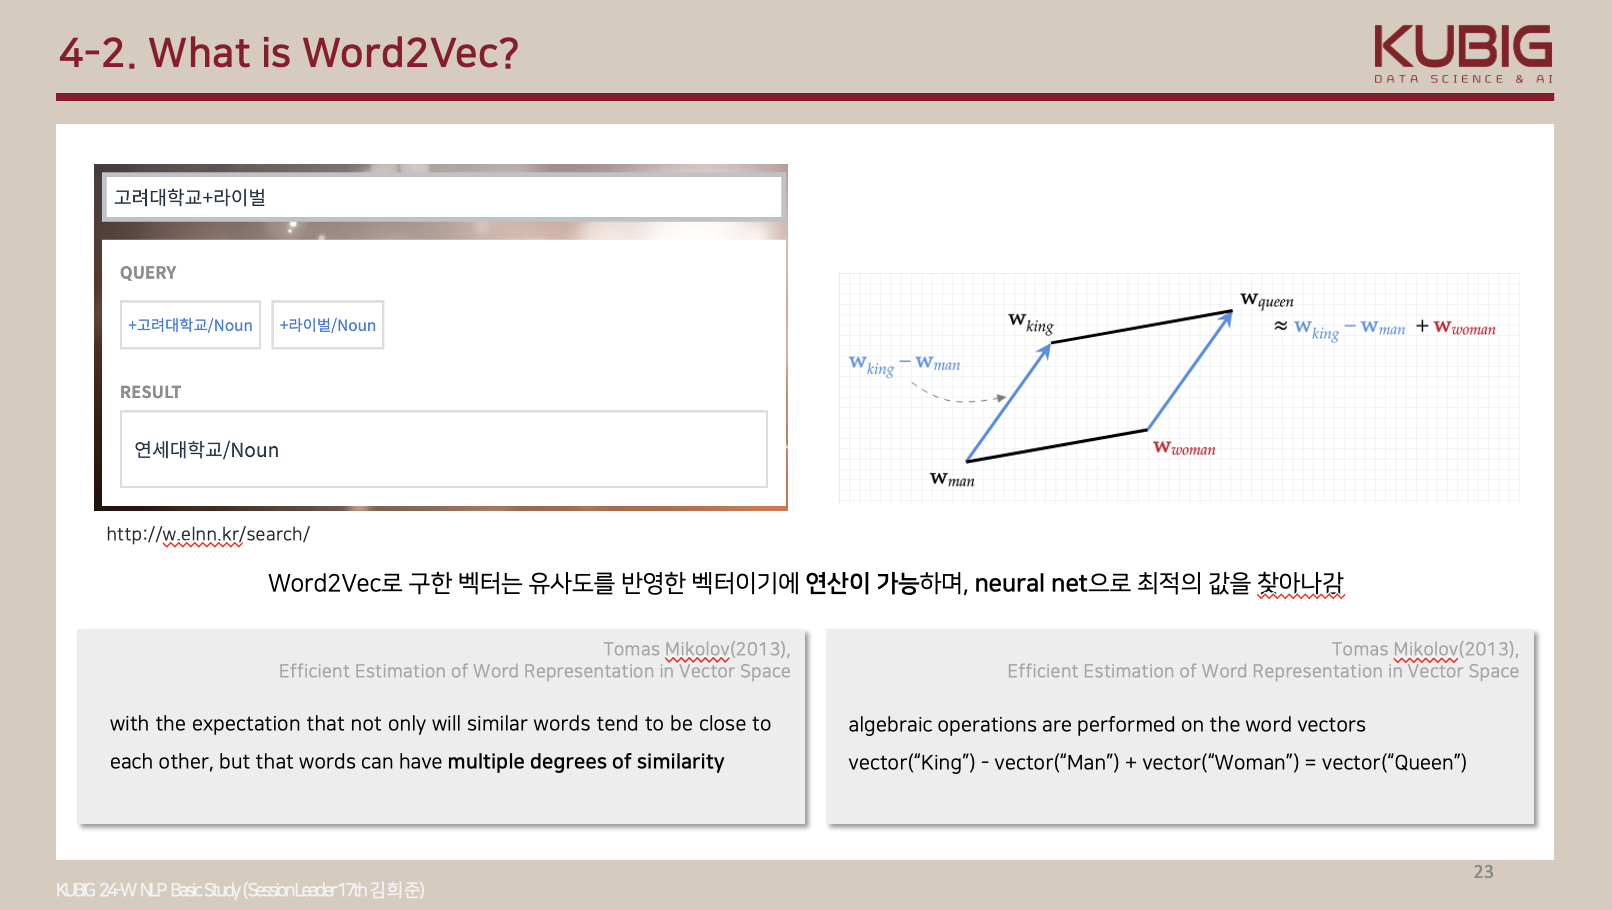
이제 word2vec를 사용하여 자모 단위로 분리하는 것이 아닌 단어 단위로 분리하여 임베딩 벡터를 생성해볼 것입니다.

In [33]:
# 간단하게 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

tokenized_data2 = []
for sentence in tqdm(total_data['reviews'].to_list()):
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data2.append(stopwords_removed_sentence)

100%|██████████| 200000/200000 [00:25<00:00, 7925.64it/s]


In [34]:
print("word2vec용 데이터:", tokenized_data2[0])
print("fasttext용 데이터:", tokenized_data[0])

word2vec용 데이터: ['배공', '빠르', '고', '굿']
fasttext용 데이터: ['ㅂㅐ-ㄱㅗㅇ', 'ㅃㅏ-ㄹㅡ-', 'ㄱㅗ-', 'ㄱㅜㅅ']


In [35]:
from gensim.models import Word2Vec

model2 = Word2Vec(sentences = tokenized_data2, vector_size = 1000, window = 5, min_count = 5, workers = 4, sg = 0)

In [36]:
# 완성된 임베딩 매트릭스의 크기 확인
# 단어의 총 개수는 14959개이고 벡터 차원은 1000으로 축소되었다.
model2.wv.vectors.shape

(15005, 1000)

## 6. FastText와 Word2Vec 결과 비교

남동생과 주문 말고도 다양한 단어를 input으로 넣어 여러분만의 해석과 인사이트를 적어주세요!

In [37]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("남동생"))

FastText 유사도: [('동생', 0.8829301595687866), ('남친', 0.8267132639884949), ('친구', 0.7790161371231079), ('생일', 0.7647615671157837), ('남편', 0.7541178464889526), ('조카', 0.7390817999839783), ('남아', 0.7115105390548706), ('언니', 0.6959642767906189), ('선물', 0.6923184990882874), ('중학생', 0.6858290433883667)]
Word2Vec 유사도: [('입학', 0.7665799260139465), ('사촌', 0.7600576877593994), ('여친', 0.7518419027328491), ('앞둔', 0.7489433884620667), ('결혼', 0.7288234829902649), ('딸래미', 0.727901816368103), ('젊', 0.7273246645927429), ('고등학교', 0.7250089049339294), ('시어머님', 0.7212027311325073), ('좋아해', 0.7199384570121765)]


In [38]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('주문'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("주문"))

FastText 유사도: [('주문건', 0.908315122127533), ('주문서', 0.8571336269378662), ('주문자', 0.7697494626045227), ('구매', 0.7623926401138306), ('구입', 0.7441419363021851), ('주무시', 0.7339511513710022), ('구매처', 0.7279245853424072), ('주무', 0.7061142921447754), ('시켰었', 0.6750567555427551), ('시킨', 0.6609402894973755)]
Word2Vec 유사도: [('구매', 0.8208271861076355), ('구입', 0.8138957023620605), ('선택', 0.6093260645866394), ('시켰', 0.5587319731712341), ('결제', 0.5484877228736877), ('도착', 0.523743212223053), ('장만', 0.5176012516021729), ('시킨', 0.5154065489768982), ('신청', 0.5138549208641052), ('준비', 0.5123529434204102)]


In [50]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('서울'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("서울"))

FastText 유사도: [('저울', 0.8770921230316162), ('거울', 0.7986860275268555), ('더울', 0.785247802734375), ('씌울', 0.756443440914154), ('누울', 0.7448716163635254), ('추울', 0.7179469466209412), ('서운', 0.7161652445793152), ('재울', 0.7079697251319885), ('채울', 0.707685649394989), ('비울', 0.7071499228477478)]
Word2Vec 유사도: [('대구', 0.7658824920654297), ('제주도', 0.7374719977378845), ('지역', 0.7221227884292603), ('업장', 0.691361129283905), ('터키', 0.6893582344055176), ('구간', 0.6826028227806091), ('이탈리아', 0.6825000643730164), ('지하철', 0.6818258166313171), ('대전', 0.6806581020355225), ('한국', 0.680461049079895)]


FastText로 계산된 유사도를 보면 Word2Vec에 비해 높은 유사도를 보여줌과 동시에 의미와 형태도 더욱 근접해있는 것을 체감할 수 있다.

또한 FastText가 조금 더 단어의 생김새에 주목하는 것처럼 체감된다. 예컨대 Word2Vec는 '주문'이라는 단어에 대해 '구입', '이용', '선택' 등 생김새에 차이가 있는 다어들도 유사한 것으로 출력한 반면, FastText는 '주문건', '주문서', '주무시' 등 생김새가 닮아있는 단어들을 우선적으로 출력하고 있다. 물론 대부분 의미적으로도 맞닿아있는 단어들을 잘 출력하고 있는 것으로 보인다.

해당 데이터셋만을 놓고보았을 때는 FastText의 성능이 보다 나은 것으로 보인다.

* 인사이트
   *  Word2Vec는 학습에 사용하지 않은 단어에 대해서는 임베딩 생성이 안되지만, FastText는 서브워드를 활용함으로, 이 단점 극복이 가능
   *  Word2Vec보다 FastText가 단어 내의 다양한 형태를 잘 학습하는 것으로 드러남
   *  '서울' 단어의 결과를 보면, FastText는 단어의 형태 측면에 매몰된 결과를 내는 양상. 오히려 의미적으로 Word2Vec가 더 비슷한 단어들을 알려줌.
   *  유사도 점수 측면에서 FastText의 결과가 더 좋은 것으로 이해되지만, 단어마다 편차가 크기에 잘 취해서 사용해야할 것.(개인적으로 FastText에서 '남동생'이라는 단어가 '남친'과의 유사도가 0.83이라는게 맘에 안 든다,,)


